In [1]:
#@title { display-mode: "form" }
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
!pip install statsmodels
import statsmodels.api as sm
!pip install geopandas
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.cm as cmx
import matplotlib.colors as colors
from geopy.distance import geodesic



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\julie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\julie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import csv

airbnb=pd.read_csv("G:\Mi unidad\Datasets\listings.csv")

## Data exploration

In [3]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20230922223302,2023-09-23,city scrape,Condo in Buenos Aires · ★4.81 · 1 bedroom · 1 ...,LUXURIOUS 1 BDRM APT- POOL/ GYM/ SPA/ 24-HR SE...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,...,4.97,4.94,4.89,NaN,f,1,1,0,0,0.26
1,107259,https://www.airbnb.com/rooms/107259,20230922223302,2023-09-23,city scrape,Rental unit in Buenos Aires · ★4.58 · 6 bedroo...,"We have 7 bedrooms and 5 bathrooms,gourmet kit...",NaN,https://a0.muscache.com/pictures/822490/5bc2ab...,555693,...,4.71,4.63,4.53,NaN,f,2,2,0,0,0.28
2,14222,https://www.airbnb.com/rooms/14222,20230922223302,2023-09-23,city scrape,Rental unit in Palermo/Buenos Aires · ★4.79 · ...,Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,...,4.90,4.89,4.75,NaN,f,7,7,0,0,0.81
3,15074,https://www.airbnb.com/rooms/15074,20230922223302,2023-09-23,previous scrape,Rental unit in Buenos Aires · 1 bedroom · 1 be...,<b>The space</b><br />I OFFER A ROOM IN MY APA...,NaN,https://a0.muscache.com/pictures/91166/c0fdcb4...,59338,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,108089,https://www.airbnb.com/rooms/108089,20230922223302,2023-09-23,city scrape,Rental unit in Buenos Aires · ★4.59 · 1 bedroo...,Amazing apartment in the best area of Palermo....,Palermo is the best neighborhhod in the city.<...,https://a0.muscache.com/pictures/717831/fbb7cd...,559463,...,4.77,4.94,4.66,NaN,f,4,4,0,0,0.77


In [4]:
airbnb.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29346 entries, 0 to 29345
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            29346 non-null  int64  
 1   listing_url                                   29346 non-null  object 
 2   scrape_id                                     29346 non-null  int64  
 3   last_scraped                                  29346 non-null  object 
 4   source                                        29346 non-null  object 
 5   name                                          29346 non-null  object 
 6   description                                   28747 non-null  object 
 7   neighborhood_overview                         16259 non-null  object 
 8   picture_url                                   29346 non-null  object 
 9   host_id                                       29346 non-null 

In [6]:
# Number of missing values in each column

for columns in airbnb.columns:
    print (columns + ', Number of Missing Values:', len(airbnb[columns][airbnb[columns].isnull()]))


id, Number of Missing Values: 0
listing_url, Number of Missing Values: 0
scrape_id, Number of Missing Values: 0
last_scraped, Number of Missing Values: 0
source, Number of Missing Values: 0
name, Number of Missing Values: 0
description, Number of Missing Values: 599
neighborhood_overview, Number of Missing Values: 13087
picture_url, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_url, Number of Missing Values: 0
host_name, Number of Missing Values: 0
host_since, Number of Missing Values: 0
host_location, Number of Missing Values: 6592
host_about, Number of Missing Values: 13008
host_response_time, Number of Missing Values: 3725
host_response_rate, Number of Missing Values: 3725
host_acceptance_rate, Number of Missing Values: 2527
host_is_superhost, Number of Missing Values: 1453
host_thumbnail_url, Number of Missing Values: 0
host_picture_url, Number of Missing Values: 0
host_neighbourhood, Number of Missing Values: 9648
host_listings_count, Number of Missing Valu

In [7]:
# Convert price from object to float. Exclude $ and ,

airbnb['price'] = airbnb['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convert host_response_rate from object to float

airbnb['host_response_rate'] = airbnb['host_response_rate'].replace({'%': ''}, regex= True).astype(float)


In [8]:

# create variable distance obelisco (latitude, longitude)
obelisco_coords = (-34.6037389, -58.3815704)

# save the distance in kilometers
airbnb['distance_obelisco'] = airbnb.apply(lambda row: geodesic(obelisco_coords, (row['latitude'], row['longitude'])).kilometers, axis=1)



In [9]:
print(airbnb['neighbourhood_cleansed'].unique())

print(airbnb['room_type'].unique())

print(airbnb['accommodates'].unique())

print(airbnb['bedrooms'].unique())

print(airbnb['bathrooms_text'].unique())


['Palermo' 'Balvanera' 'Nuñez' 'Monserrat' 'Constitucion' 'San Nicolas'
 'Chacarita' 'Almagro' 'Recoleta' 'Belgrano' 'Parque Chacabuco'
 'Villa Crespo' 'Villa Urquiza' 'Retiro' 'San Telmo' 'Barracas' 'Coghlan'
 'Boedo' 'Colegiales' 'San Cristobal' 'Puerto Madero' 'Villa Luro' 'Boca'
 'Villa Devoto' 'Saavedra' 'Caballito' 'Flores' 'Monte Castro'
 'Villa Ortuzar' 'Villa Gral. Mitre' 'Velez Sarsfield' 'Paternal'
 'Villa Del Parque' 'Floresta' 'Villa Pueyrredon' 'Villa Santa Rita'
 'Parque Patricios' 'Liniers' 'Agronomia' 'Parque Avellaneda' 'Villa Real'
 'Parque Chas' 'Villa Lugano' 'Versalles' 'Nueva Pompeya'
 'Villa Riachuelo' 'Villa Soldati' 'Mataderos']
['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
[ 2 12  1  3  4  5  6  9 14  8  7 16 15 11 10 13]
[ 1.  6. nan  2.  3.  4.  7.  5. 14. 22.  8. 10.  9. 25. 35. 16. 11. 12.]
['1 bath' '5 baths' '1.5 baths' '1.5 shared baths' nan '1 shared bath'
 '2 baths' '3 baths' '5.5 baths' '2.5 baths' '0 baths' '2.5 shared baths'
 '2 sh

## Data cleaning

In [10]:
# Neighbourhood by comunnes

condition = [
    airbnb['neighbourhood_cleansed'].isin(['Constitucion', 'Monserrat', 'Puerto Madero', 'Retiro', 'San Nicolas', 'San Telmo']),
    airbnb['neighbourhood_cleansed'].isin(['Recoleta']),
    airbnb['neighbourhood_cleansed'].isin(['Balvanera', 'San Cristobal']),
    airbnb['neighbourhood_cleansed'].isin(['Barracas', 'Boca', 'Nueva Pompeya', 'Parque Patricios']),
    airbnb['neighbourhood_cleansed'].isin(['Almagro', 'Boedo']),
    airbnb['neighbourhood_cleansed'].isin(['Caballito']),
    airbnb['neighbourhood_cleansed'].isin(['Flores', 'Parque Chacabuco']),
    airbnb['neighbourhood_cleansed'].isin(['Villa Lugano', 'Villa Riachuelo', 'Villa Soldati']),
    airbnb['neighbourhood_cleansed'].isin(['Liniers', 'Mataderos', 'Parque Avellaneda']),
    airbnb['neighbourhood_cleansed'].isin(['Floresta', 'Monte Castro', 'Velez Sarsfield', 'Versalles', 'Villa Luro', 'Villa Real']),
    airbnb['neighbourhood_cleansed'].isin(['Villa Del Parque', 'Villa Devoto', 'Villa Gral. Mitre', 'Villa Santa Rita']),
    airbnb['neighbourhood_cleansed'].isin(['Coghlan', 'Saavedra', 'Villa Pueyrredon', 'Villa Urquiza']),
    airbnb['neighbourhood_cleansed'].isin(['Belgrano', 'Colegiales', 'Nunez','Nuñez']),
    airbnb['neighbourhood_cleansed'].isin(['Palermo']),
    airbnb['neighbourhood_cleansed'].isin(['Agronomia', 'Chacarita', 'Paternal', 'Villa Crespo', 'Villa Ortuzar', 'Parque Chas'])
]

opciones = [
    'Comuna 1',
    'Comuna 2',
    'Comuna 3',
    'Comuna 4',
    'Comuna 5',
    'Comuna 6',
    'Comuna 7',
    'Comuna 8',
    'Comuna 9',
    'Comuna 10',
    'Comuna 11',
    'Comuna 12',
    'Comuna 13',
    'Comuna 14',
    'Comuna 15'
]

# Create variables
airbnb['Comuna'] = np.select(condition, opciones, default="Otro")

print(airbnb[['neighbourhood_cleansed', 'Comuna']].head())


  neighbourhood_cleansed     Comuna
0                Palermo  Comuna 14
1              Balvanera   Comuna 3
2                Palermo  Comuna 14
3                  Nuñez  Comuna 13
4                Palermo  Comuna 14


In [11]:
print(airbnb['room_type'].value_counts())

Entire home/apt    26467
Private room        2565
Shared room          215
Hotel room            99
Name: room_type, dtype: int64


In [12]:
# Extract number of bathroom from bathroom_text

airbnb['bathroom'] = airbnb['bathrooms_text'].str.extract(r'(\d+)', expand=False)

airbnb['bathroom'] = pd.to_numeric(airbnb['bathroom'])

print(airbnb[['bathrooms_text', 'bathroom']])

      bathrooms_text  bathroom
0             1 bath       1.0
1            5 baths       5.0
2             1 bath       1.0
3             1 bath       1.0
4             1 bath       1.0
...              ...       ...
29341         1 bath       1.0
29342        2 baths       2.0
29343      1.5 baths       1.0
29344         1 bath       1.0
29345  1 shared bath       1.0

[29346 rows x 2 columns]


In [13]:
# Create a new column with the price in USD. Date scrape 23/09/2023. usd = $ * 0.002724795640327
airbnb['price_usd'] = airbnb['price'] * 0.002724795640327

In [14]:
airbnb['amenities_count'] = airbnb['amenities'].apply(lambda x: len(eval(x)))


In [15]:
# Choose only the variables of interest

variables = ['price', 'price_usd',
             'id',
             'Comuna', #number of communities
             'neighbourhood_cleansed',
             'room_type', 'accommodates', 'bedrooms', 'bathroom', 'beds', 'distance_obelisco', # categorical
             'number_of_reviews','review_scores_value','review_scores_location','review_scores_communication','review_scores_checkin',
             'review_scores_cleanliness','review_scores_accuracy', 'review_scores_rating', # review
             'calculated_host_listings_count_entire_homes', # host's listings
             'availability_30', # availability
             'latitude','longitude' # geolocation
               ]

In [16]:
# Create new dataframe with only the variables of interest
data = airbnb[variables]

#drop rows with missing values
data.dropna(inplace=True)

C:\Users\julie\AppData\Local\Temp\ipykernel_1524\324918583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


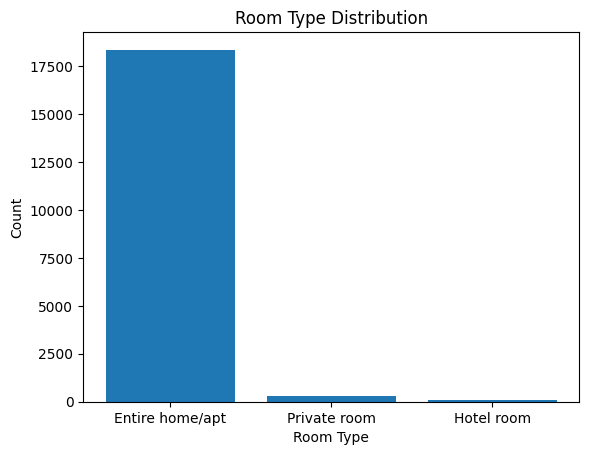

In [17]:
# Count the occurrences of each room type
room_type_counts = data['room_type'].value_counts()

# Plot a bar chart of room type
plt.bar(room_type_counts.index, room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')
plt.show()

In [18]:


# Create dummy variables for room type
dummy_variables = pd.get_dummies(data['room_type'])

# Concatenate the dummy variables with the original dataframe
data = pd.concat([data, dummy_variables], axis=1)


In [19]:
# delete outliers in price sigma method

# Calculate the mean and standard deviation of the price variable
price_mean = data['price'].mean()
price_std = data['price'].std()

# calculate Q1 and Q3 for the price variable
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

# Calculate the interquartile range
IQR = Q3 - Q1

# Define the lower and upper bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 0.5 * IQR

# Delete the rows with price values outside the bounds
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]



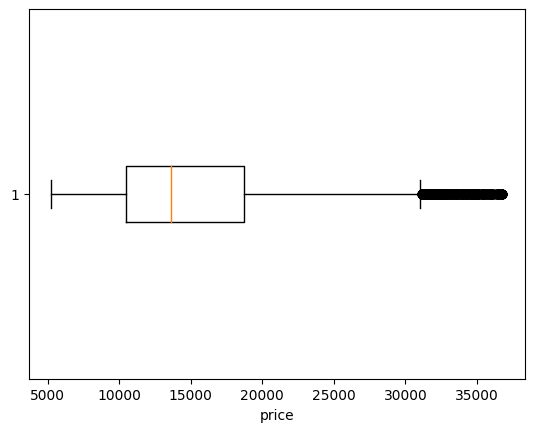

In [20]:

# Boxplot of price

plt.boxplot(data['price'], vert=False)
plt.xlabel('price')
plt.show()

In [21]:
data.describe()

,price,price_usd,id,accommodates,bedrooms,bathroom,beds,distance_obelisco,number_of_reviews,review_scores_value,...,review_scores_cleanliness,review_scores_accuracy,review_scores_rating,calculated_host_listings_count_entire_homes,availability_30,latitude,longitude,Entire home/apt,Hotel room,Private room
count,16984.000000,16984.000000,1.698400e+04,16984.000000,16984.000000,16984.000000,16984.000000,16984.000000,16984.000000,16984.000000,...,16984.000000,16984.000000,16984.000000,16984.000000,16984.000000,16984.000000,16984.000000,16984.000000,16984.000000,16984.000000
mean,15443.959256,42.081633,4.771795e+17,2.929699,1.262482,1.094854,1.866816,4.204312,26.450954,4.737532,...,4.744712,4.815701,4.781091,15.160563,13.280676,-34.590391,-58.417957,0.985634,0.001649,0.012718
std,6783.529093,18.483730,4.021233e+17,1.113319,0.597836,0.352663,1.094723,2.651073,39.450863,0.365751,...,0.365494,0.331563,0.348416,33.147565,10.447765,0.017827,0.029770,0.119000,0.040571,0.112057
min,5251.000000,14.307902,1.150800e+04,1.000000,1.000000,0.000000,1.000000,0.006134,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,-34.657210,-58.528742,0.000000,0.000000,0.000000
25%,10501.000000,28.613079,3.623768e+07,2.000000,1.000000,1.000000,1.000000,1.988482,4.000000,4.670000,...,4.670000,4.770000,4.710000,1.000000,3.000000,-34.600426,-58.437541,1.000000,0.000000,0.000000
50%,13651.000000,37.196185,6.725994e+17,3.000000,1.000000,1.000000,2.000000,3.929229,13.000000,4.830000,...,4.840000,4.910000,4.880000,2.000000,13.000000,-34.589930,-58.419693,1.000000,0.000000,0.000000
75%,18751.000000,51.092643,8.441822e+17,4.000000,1.000000,1.000000,2.000000,5.782708,32.000000,5.000000,...,5.000000,5.000000,5.000000,10.000000,23.000000,-34.580227,-58.393989,1.000000,0.000000,0.000000
max,36753.000000,100.144414,9.839154e+17,16.000000,22.000000,22.000000,28.000000,13.963050,533.000000,5.000000,...,5.000000,5.000000,5.000000,205.000000,30.000000,-34.534980,-58.355530,1.000000,1.000000,1.000000


## Data visualization

In [22]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

C:\Users\julie\AppData\Local\Temp\ipykernel_1524\2232333918.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\julie\AppData\Local\Temp\ipykernel_1524\2232333918.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [23]:
#@title Interactive Map of Buenos Aires

import folium
from folium.plugins import FastMarkerCluster


map_buenos_aires = folium.Map(location=[-34.61, -58.38], zoom_start=12, tiles='cartodbpositron' , zoom_control=False)

marker_cluster = FastMarkerCluster(data[['latitude', 'longitude', 'price']].values.tolist())
map_buenos_aires.add_child(marker_cluster)

map_buenos_aires

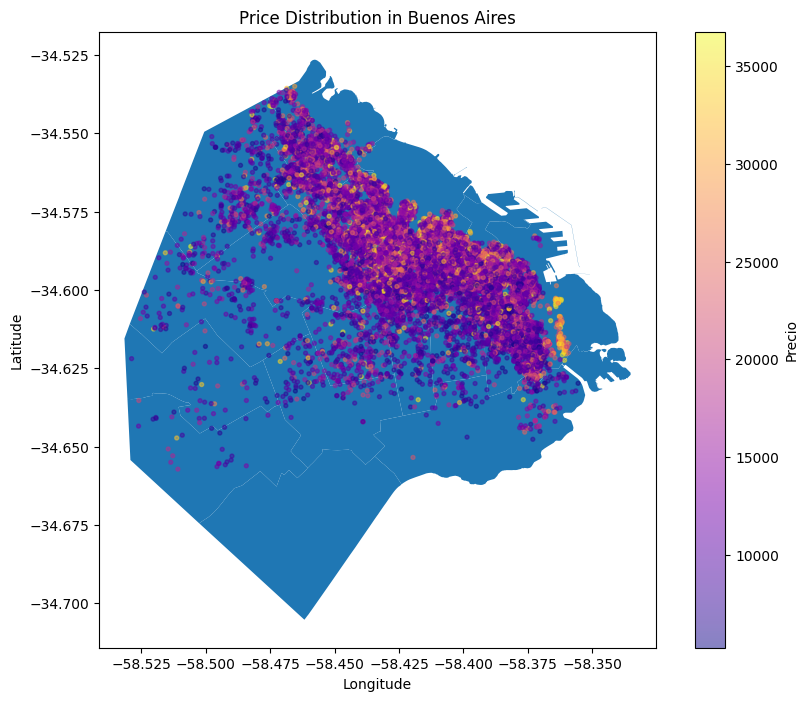

In [24]:
buenos_aires_map = gpd.read_file('G:\Mi unidad\comunas')

fig, ax = plt.subplots(figsize=(10, 8))

buenos_aires_map.plot(ax=ax)


scatter = ax.scatter(data['longitude'], data['latitude'], alpha=0.5,c= data['price'], s=8, cmap= 'plasma' )


plt.colorbar(scatter, label='Precio')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Price Distribution in Buenos Aires')

plt.show()

In [26]:
# Count property group by neighborhood  

data['neighborhood_count'] = data.groupby('neighbourhood_cleansed')['id'].transform('count')

fig = px.treemap(data, values='neighborhood_count', labels='neighborhood_cleansed', path=['Comuna', 'neighbourhood_cleansed'])


fig.show()

In [27]:
data = pd.get_dummies(data, columns=['Comuna'])

In [28]:
data['log_price'] = np.log(data['price'])

In [29]:
X = data.drop(['price', 'log_price', 'price_usd', 'id',
               'neighbourhood_cleansed',           
               'room_type', 'Hotel room', 'Private room', # interest entire home
               ], axis=1) 
y = data['log_price']

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16984 entries, 0 to 29190
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accommodates                                 16984 non-null  int64  
 1   bedrooms                                     16984 non-null  float64
 2   bathroom                                     16984 non-null  float64
 3   beds                                         16984 non-null  float64
 4   distance_obelisco                            16984 non-null  float64
 5   number_of_reviews                            16984 non-null  int64  
 6   review_scores_value                          16984 non-null  float64
 7   review_scores_location                       16984 non-null  float64
 8   review_scores_communication                  16984 non-null  float64
 9   review_scores_checkin                        16984 non-null  float64
 10

In [31]:
X = sm.add_constant(X) 
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     228.3
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:08:56   Log-Likelihood:                -6019.8
No. Observations:               16984   AIC:                         1.211e+04
Df Residuals:                   16951   BIC:                         1.236e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------